<font color="green">*To start working on this notebook, or any other notebook that we will use in the Moringa Data Science Course, we will need to save our own copy of it. We can do this by clicking File > Save a Copy in Drive. We will then be able to make edits to our own copy of this notebook.*</font>

# Python Programming: The K-Nearest Neighbours (KNN)

## Examples

### Example 1: Classification

In [0]:
# Example 
# ---
# Question: Predict the class to which these plants belong. 
# There are three classes in the dataset: Iris-setosa, Iris-versicolor and Iris-virginica. 
# ---
# Dataset url = http://bit.ly/DatasetIris
# ---
# 
# OUR CODE GOES HERE

In [0]:
# Importing our libraries
# ---
# 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# Loading our dataset
# ---
# 

# Assign colum names to the dataset
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe
dataset = pd.read_csv("http://bit.ly/DatasetIris", names = names)

In [0]:
# Previewing our datset
# ---
# 
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [0]:
dataset.Class.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['Class'] = le.fit_transform(dataset['Class'])

In [0]:
# Splitting our dataset into its attributes and labels
# ---
# The X variable contains the first four columns of the dataset (i.e. attributes) while y contains the labels.
# ---
# 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [0]:
# Train Test Split
# ---
# To avoid over-fitting, we will divide our dataset into training and test splits, 
# which gives us a better idea as to how our algorithm performed during the testing phase. 
# This way our algorithm is tested on un-seen data
# ---
# 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [0]:
# Feature Scaling
# ---
# Before making any actual predictions, it is always a good practice to scale the features 
# so that all of them can be uniformly evaluated.
# ---
# 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


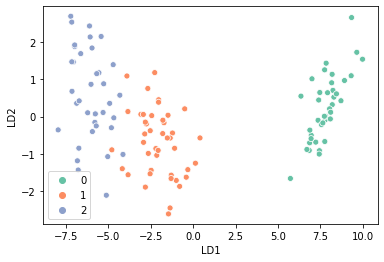

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
x_lda = lda.fit_transform(X_train, y_train)
lda.explained_variance_ratio_

import matplotlib.pyplot as plt
import seaborn as sns
plt.xlabel('LD1')
plt.ylabel('LD2')

# plt.scatter(x_lda[:,0], x_lda[:,1] ,c = y_train, cmap = 'rainbow', alpha= 0.7, edgecolors= 'b', )
sns.scatterplot(x_lda[:,0], x_lda[:, 1], hue = y_train, alpha= 1, palette= 'Set2')

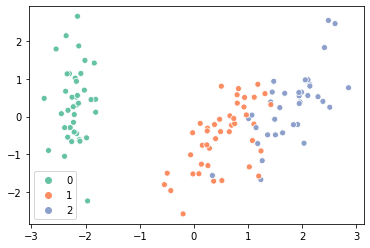

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_pca = pca.fit_transform(X_train, y_train)

sns.scatterplot(x_pca[:,0], x_pca[:, 1], hue = y_train, alpha= 1, palette= 'Set2')

In [0]:
# Training and Predictions
# ---
# The first step is to import the KNeighborsClassifier class from the sklearn.neighbors library. 
# In the second line, this class is initialized with one parameter, i.e. n_neigbours. 
# This is basically the value for the K. There is no ideal value for K and it is selected after testing and evaluation, 
# however to start out, 5 seems to be the most commonly used value for KNN algorithm.
# ---
# 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
# The final step is to make predictions on our test data
# ---
# 
y_pred = classifier.predict(X_test)

In [0]:
# Evaluating the Algorithm
# ---
# For evaluating an algorithm, confusion matrix, precision, recall and f1 score are the most commonly used metrics. 
# The confusion_matrix and classification_report methods of the sklearn.metrics can be used to calculate these metrics. 
# ---
# 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0  7  0]
 [ 0  2 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.78      1.00      0.88         7
           2       1.00      0.85      0.92        13

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



### Example 2: Regression

In [0]:
# Example 2
# ---
# Question: Predict the age of a voter through the use of other variables in the dataset.
# ---
# 
# OUR CODE GOES HERE

In [0]:
# First installing pydataset
# ---
!pip install pydataset 

In [0]:
# Then loading our libraries
# 
from pydataset import data
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [0]:
# Previewing our turnout dataset
# ---
# 
df = data("turnout")
df.head()

,race,age,educate,income,vote
1,white,60,14.0,3.3458,1
2,white,51,10.0,1.8561,0
3,white,24,12.0,0.6304,0
4,white,38,8.0,3.4183,1
5,white,25,12.0,2.7852,1


In [0]:
# Determining the size of the dataset
# 
df.shape

(2000, 5)

In [0]:
# Splitting our data
# ---
# 
X = df[['age','income','vote']]
y = df['educate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [0]:
# Training our algorithm
# ---
# 
clf = KNeighborsRegressor(11)
clf.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                    weights='uniform')

In [0]:
# Making our prediction
# ---
# 
y_pred = clf.predict(X_test)

print(np.sqrt(mean_squared_error(y_test, y_pred)))


3.0396388387393087


## <font color="green">Challenge 1</font>

In [0]:
# Challenge 1
# ---
# Question: Predict the income level based on the individual’s personal information in the given dataset.
# ---
# Dataset url = http://bit.ly/DatasetAdult
# ---
# 

import numpy as np

df = pd.read_csv('http://bit.ly/DatasetAdult')

column = ['workclass',  'education',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'native-country',
       'income']

for i, col in enumerate(column):
  df[col] = df[col].replace("?", np.NAN)

new_col = ['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']

df_new = df.dropna()

for i, col in enumerate(new_col):
  df_new[col] = le.fit_transform(df_new[col])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [0]:
X = df_new.iloc[:, :-1].values
y = df_new.iloc[:, -1].values

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)


In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

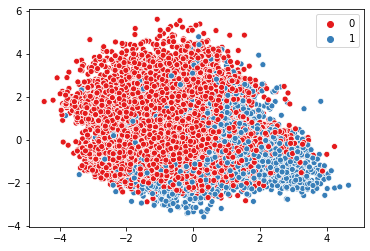

In [0]:

# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

x_lda = pca.fit_transform(X_train, y_train)

pca.explained_variance_ratio_
sns.scatterplot(x_lda[:,0] ,x_lda[:,1], hue = y_train, palette= 'Set1')

In [0]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

from sklearn.model_selection import GridSearchCV

search = GridSearchCV(clf, param_grid= {'n_neighbors': np.arange(20,30, 3)}, n_jobs= 1, refit=True, cv = 5)


In [0]:
search.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=1,
             param_grid={'n_neighbors': array([20, 23, 26, 29])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
search.best_params_

{'n_neighbors': 26}

In [0]:
clf = KNeighborsClassifier(n_neighbors=26)
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=26, p=2,
                     weights='uniform')

In [0]:
y_pred = clf.predict(X_test)

In [0]:
confusion = pd.DataFrame({'Actual': y_test.flatten(), 'Predict': y_pred.flatten()})


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


array([[9438,  799],
       [1347, 1983]])

In [0]:
from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90     10237
           1       0.71      0.60      0.65      3330

    accuracy                           0.84     13567
   macro avg       0.79      0.76      0.77     13567
weighted avg       0.84      0.84      0.84     13567



## <font color="green">Challenge 2</font>

In [0]:
# Challenge 2
# ---
# Question: Using KNN, predict if the client will subscribe a term deposit (variable y).
# ---
# Dataset url = http://bit.ly/DatasetBank
# ---
# Dasest info = http://bit.ly/DatasetBankInfo
# ---
# 
OUR CODE GOES HERE

## <font color="green">Challenge 3</font>

In [0]:
# Challenge 3
# ---
# Question: Predict if a person will have diabetes or not using the KNN algorithm.
# ---
# Dataset url = http://bit.ly/DatasetDiabetes
# ---
# 
OUR CODE GOES HERE

## <font color="green">Challenge 4</font>

In [0]:
# Challenge 4
# ---
# Question: Predict the miles per gallon (mpg) of a car, given its displacement and horsepower.
# ---
# Dataset Train url = http://bit.ly/AutoMPGTrainDataset
# Dataset Test url = http://bit.ly/AutoMPGTestDataset 
# ---
# 
OUR CODE GOES HERE

## <font color="green">Challenge 5</font>

In [0]:
# Challenge 6
# ---
# Question: Predict the target class given the following dataset.
# ---
# Dataset url = http://bit.ly/ClassifiedDataset
# ---
# 
OUR CODE GOES HERE